**Bank Customer Churn**

## ReadMe

### Постановка общей задачи:



Проводится работа с небольшой банковской выборкой по оттоку клиентов. На этих данных будет построена модель классификации, определяющая отток клиента в зависимости от его характеристик.

### Описание датасета:



RowNumber—corresponds to the record (row) number and has no effect on the output.
CustomerId—contains random values and has no effect on customer leaving the bank.
Surname—the surname of a customer has no impact on their decision to leave the bank.
CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
Geography—a customer’s location can affect their decision to leave the bank.
Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
NumOfProducts—refers to the number of products that a customer has purchased through the bank.
HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
IsActiveMember—active customers are less likely to leave the bank.
EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
Exited—whether or not the customer left the bank.
Complain—customer has complaint or not.
Satisfaction Score—Score provided by the customer for their complaint resolution.
Card Type—type of card hold by the customer.
Points Earned—the points earned by the customer for using credit card.


Ниже представлены задачи по проекту построения модели.


0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортированы библиотеки, которые необходимы для работы с данными. 

1. *Data Preparation*

В этом блоке:
* произведены преобразования типов данных.
* исследованы и обработаны данные с пропусками.
* обработаны выбросы.

2. *Feature engineering*

В этом блоке:
* проведено преобразование категориальных переменных.
* нормализованы количественные переменные с помощью MinMaxScaler.
* удалены неинформативные колонки.
* сформиран финальный датасет, на котором будет производиться моделирование.

3. *Modelling*

В этом блоке:
* инициализированы фичи и целевая переменная.
* данные разделены на тренировачную и тестовую выборки.
* на тренировочных и тестовых данных обучена модель случайного леса.

4. *Results*

В этом блоке:
* обученная модель использована на всей выборке.

##Загрузка данных, создание датафрейма.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [160]:
df = pd.read_csv('/content/drive/MyDrive/Customer-Churn-Records.csv')

In [161]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [162]:
df_c = df.copy().set_index('RowNumber')

In [163]:
df_c.shape

(10000, 17)

## Data preparation


In [164]:
df_c.columns.tolist()

['CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Card Type',
 'Point Earned']

In [165]:
#Пропуски отсутсвуют.
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Poin

In [166]:
#Функция для поиска выбросов
def calculate_outliers_3sigma(data):
    a25 = data.mean() - data.std() * 3
    a75 = data.mean() + data.std() * 3
    b = (a25, a75)
    return b
#Функция для удаления выбросов
def delete_vibros(data):
    elems = []
    data = data.index
    for elem in data:
        elems.append(elem)
    df_c.drop(elems, axis=0, inplace=True)

In [167]:
#Сразу удалим колонки, которые не влияют на целевую переменную.
df_c = df_c.drop(['CustomerId', 'Surname'], axis=1)

In [180]:
#Проведем поиск и удаление выбросов в данных.
vibros_CredScore = calculate_outliers_3sigma(df_c.CreditScore)
vibros_CredScore

(360.568903791609, 940.488696208391)

In [169]:
vibros_CredScore = (df_c['CreditScore'] < vibros_CredScore[0]) | (df_c['CreditScore'] > vibros_CredScore[1])
vibros_CredScore.sum()

8

In [184]:
df_c[df_c['CreditScore'] < vibros_CredScore[0]]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,
1406,359,France,Female,44,6,128747.69,1,1,0,146955.71,1,1,1,PLATINUM,981
1632,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1,1,3,SILVER,643
1839,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1,1,2,GOLD,261
1963,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1,1,4,SILVER,976
2474,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1,1,4,SILVER,453
8724,350,France,Male,51,10,0.00,1,1,1,125823.79,1,1,4,GOLD,383
8763,350,France,Female,60,3,0.00,1,0,0,113796.15,1,1,1,SILVER,958
9625,350,France,Female,40,0,111098.85,1,1,1,172321.21,1,1,2,DIAMOND,670


In [185]:
#Выбросы в колонке кредитного рейтинга удалены.
delete_vibros(df_c[df_c['CreditScore'] < vibros_CredScore[0]])

In [186]:
vibros_Balance = calculate_outliers_3sigma(df_c.Balance)
vibros_Balance

(-110717.85957332123, 263650.19480951014)

In [187]:
#Выбросы в колонке баланса отсутсвуют.
vibros_Balance_all = (df_c['Balance'] < vibros_Balance[0]) | (df_c['Balance'] > vibros_Balance[1])
vibros_Balance_all.sum()

0

In [188]:
vibros_Salary = calculate_outliers_3sigma(df_c.EstimatedSalary)
vibros_Salary

(-72486.58488368226, 272589.93667511543)

In [189]:
#Выбросы в колонке зарплаты отсутсвуют.
vibros_Salary_a = (df_c['EstimatedSalary'] < vibros_Salary[0]) | (df_c['EstimatedSalary'] > vibros_Salary[1])
vibros_Salary_a.sum()

0

In [190]:
vibros_Point = calculate_outliers_3sigma(df_c['Point Earned'])
vibros_Point

(-71.18030117348212, 1284.1158496122332)

In [191]:
#Выбросы в колонке баллов отсутсвуют.
vibros_Point_a = (df_c['Point Earned'] < vibros_Point[0]) | (df_c['Point Earned'] > vibros_Point[1])
vibros_Point_a.sum()

0

In [192]:
df_c.NumOfProducts.value_counts()

1    5078
2    4589
3     265
4      60
Name: NumOfProducts, dtype: int64

In [193]:
df_c['Satisfaction Score'].value_counts()

3    2041
2    2012
4    2005
5    2004
1    1930
Name: Satisfaction Score, dtype: int64

In [194]:
df_c['Tenure'].value_counts()

2     1048
1     1034
7     1028
8     1024
5     1012
3     1008
4      988
9      984
6      966
10     489
0      411
Name: Tenure, dtype: int64

In [195]:
#Преобразования в колонках  NumOfProducts, Satisfaction Score, Tenure не требуется.

In [251]:
#В результате анализа корреляции целевой переменной можно отметить зависимость с полом, возрастом, балансом, активностью, жалобами.
df_c.corr()['Exited']

<ipython-input-251-1792a1e8e2fb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_c.corr()['Exited']


CreditScore          -0.020784
Age                   0.312037
Tenure               -0.013467
Balance               0.118099
NumOfProducts        -0.047659
HasCrCard            -0.006931
IsActiveMember       -0.154096
EstimatedSalary       0.010720
Exited                1.000000
Complain              0.995668
Satisfaction Score   -0.004476
Point Earned         -0.004912
Name: Exited, dtype: float64

In [255]:
df_c.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [258]:
#Самая высокая доля оттока среди клиентов Германии. Следует отметить, что клиентов из Германии меньше всего. По какой то причине клиенты из Германии уходят больше всего. Можно проверить долю их жалоб.
df_c.groupby('Geography').agg({'Balance':'mean', 'Point Earned':'count', 'Exited':'mean', 'CreditScore':'mean'}).rename(columns={'Point Earned':'Count'})

,Balance,Count,Exited,CreditScore
Geography,,,,
France,62217.814829,4976,0.161977,649.760852
Germany,119807.049312,2485,0.326358,651.736821
Spain,61721.898703,2459,0.167141,651.503050


In [260]:
#Доля жалоб среди клиентов Германии самая высокая. При этом кредитный рейтинг не отличается, и показатель лояльности в норме. Возможно, клиенты Германии испытывают какие то технические проблемы при использовании услуг банка.
df_c.groupby('Geography').agg({'Complain':'mean', 'Point Earned':'count', 'Satisfaction Score':'mean', 'Tenure':'mean'}).rename(columns={'Point Earned':'Count'})

,Complain,Count,Satisfaction Score,Tenure
Geography,,,,
France,0.162178,4976,3.016881,5.003818
Germany,0.328370,2485,3.004024,5.013682
Spain,0.167141,2459,3.013827,5.027654


In [261]:
#Из анализа относительно пола клиента видно, что клиенты женского пола уходят чаще.
df_c.groupby('Gender').agg({'Balance':'mean', 'Point Earned':'count', 'Exited':'mean', 'CreditScore':'mean'}).rename(columns={'Point Earned':'Count'})

,Balance,Count,Exited,CreditScore
Gender,,,,
Female,75709.356867,4503,0.251388,651.143460
Male,77196.100991,5417,0.165405,650.308843


<Axes: xlabel='Age'>

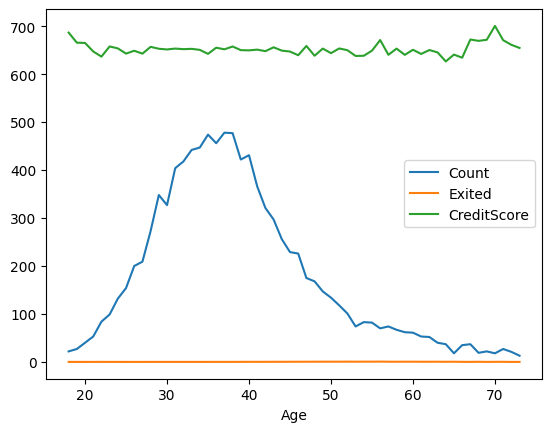

In [262]:
#Кредитный рейтинг не меняется в зависимости от возараста, за исключением очень пожилых клиентов. Возможно такой показатель из-за их немногочисленности.
#Основная масса клиентов в возрасте 25-45 лет.
df_c.groupby('Age').agg({'Point Earned':'count', 'Exited':'mean', 'CreditScore':'mean'}).rename(columns={'Point Earned':'Count'}).plot()

<Axes: xlabel='Age'>

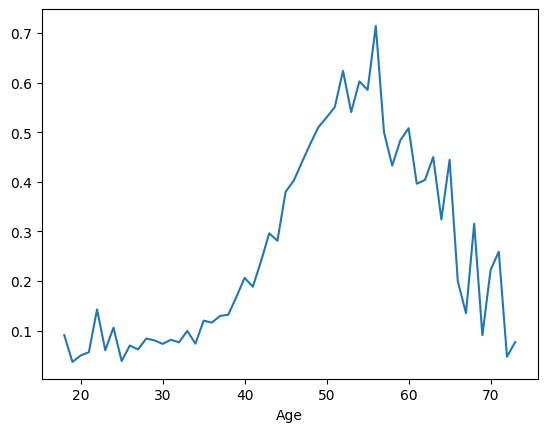

In [264]:
#Основная возрастная категория оттока: 45-65 лет.
#Можно выделить три группы клиентов: 18-45, 46-65, 65+.
df_c.groupby('Age')['Exited'].mean().plot()

In [271]:
table_of_age = df_c.groupby('Age').agg({'Point Earned':'count', 'Exited':'mean', 'CreditScore':'mean'}).reset_index().rename(columns={'Point Earned':'Count'})
table_of_age.head()

,Age,Count,Exited,CreditScore
0,18,22,0.090909,686.681818
1,19,27,0.037037,665.629630
2,20,40,0.050000,665.050000
3,21,53,0.056604,647.283019
4,22,84,0.142857,636.547619


In [268]:
#Можно удалить клиентов, которых меньше 10.
table_of_age[table_of_age['Count'] < 10]

,Age,Count,Exited,CreditScore


In [241]:
df_c = df_c.query("Age < 74")

In [242]:
#Кредитный рейтинг не играет роли.
df_c.groupby('Exited')['CreditScore'].mean()

Exited
0    651.702864
1    646.737179
Name: CreditScore, dtype: float64

<Axes: xlabel='Tenure'>

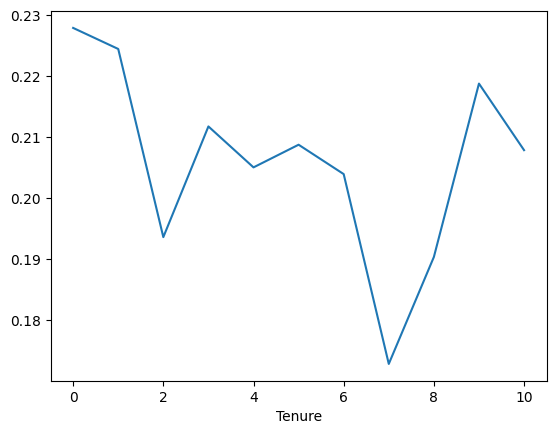

In [272]:
#Зависимости от срока владения картой не наблюдается.
df_c.groupby('Tenure')['Exited'].mean().plot()

In [273]:
#Видно зависимость с переменной жалобы. Большинство тех, кто подавал жалобу ушли. Возможно, это связано с низким качеством поддержки.
df_c.groupby(['Complain', 'Exited'])['CreditScore'].count().reset_index().rename(columns = {'CreditScore':'Count'})

,Complain,Exited,Count
0,0,0,7882
1,0,1,4
2,1,0,10
3,1,1,2024


<Axes: xlabel='Satisfaction Score'>

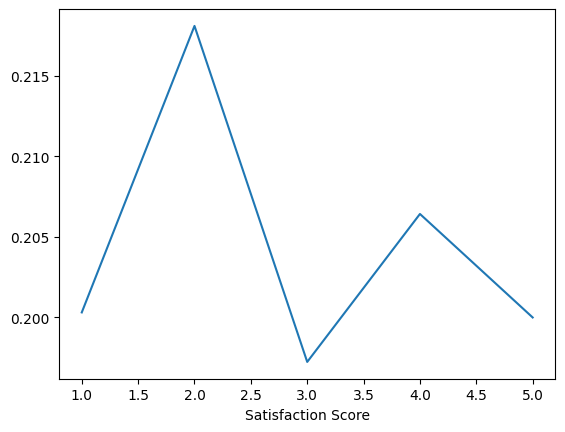

In [274]:
#_Признаки удовлетворенности и баллов можно удалить.
df_c.groupby('Satisfaction Score')['Exited'].mean().plot()

In [275]:
#Средний баланс ушедших выше.
df_c.groupby('Exited')['Balance'].mean()

Exited
0    72785.239370
1    91059.863871
Name: Balance, dtype: float64

In [276]:
#Чаще уходят нелояльные клиенты.
df_c.groupby('Exited')['IsActiveMember'].mean()

Exited
0    0.551445
1    0.360454
Name: IsActiveMember, dtype: float64

In [277]:
#Зависимость от типа карты не выражена.
df_c.groupby('Card Type')['Exited'].mean()

Card Type
DIAMOND     0.219090
GOLD        0.193626
PLATINUM    0.204115
SILVER      0.200887
Name: Exited, dtype: float64

Выводы:
1. Удалим колонки, которые слабо влияют на целевую переменную: HasCrCard, Satisfaction Score, Point Earned, NumOfProducts.
2. Присвоим числовые переменные колонкам 'Geography', 'Gender', 'Age', 'Card type', чтобы модели было проще.
3. Нормируем колонки CreditScore, Balance, EstimatedSalary.


##Feature engineering


In [278]:
df_c = df_c.drop(['HasCrCard', 'Satisfaction Score', 'Point Earned', 'NumOfProducts'], axis=1)

In [279]:
category_values = ['Geography', 'Gender', 'Card Type']

In [280]:
df_c[category_values]

,Geography,Gender,Card Type
RowNumber,,,
1,France,Female,DIAMOND
2,Spain,Female,DIAMOND
3,France,Female,DIAMOND
4,France,Female,GOLD
5,Spain,Female,GOLD
...,...,...,...
9996,France,Male,DIAMOND
9997,France,Male,PLATINUM
9998,France,Female,SILVER


In [281]:
df_c.Gender = df_c.Gender.apply(lambda x: 1 if x == 'Male' else 0)

In [282]:
df_c['Card Type'] = df_c['Card Type'].replace({'SILVER': 1, 'GOLD': 2, 'PLATINUM': 3, 'DIAMOND': 4})

In [283]:
df_c['Geography'] = df_c['Geography'].replace({'France': 1, 'Germany': 2, 'Spain': 3})

In [284]:
#Норминование.
MinMax = MinMaxScaler()

In [285]:
MinMax.fit(df_c[['CreditScore', 'Balance', 'EstimatedSalary']])

MinMaxScaler()

In [286]:
MinMax_1 = MinMax.transform(df_c[['CreditScore', 'Balance', 'EstimatedSalary']])

In [287]:
MinMax_1

array([[0.52566735, 0.        , 0.50673489],
       [0.50308008, 0.33403148, 0.56270874],
       [0.28542094, 0.63635718, 0.56965435],
       ...,
       [0.71047228, 0.        , 0.21039009],
       [0.83983573, 0.29922631, 0.46442905],
       [0.88090349, 0.51870777, 0.19091423]])

In [289]:
df_c[MinMax.get_feature_names_out()] = MinMax_1

In [290]:
df_c.to_csv('df_churn_of_clients_ready')

##Modeling

In [291]:
#Инициализируем фичи и целевую переменную.
x = df_c.drop('Exited', axis=1)
y = df_c.Exited

In [292]:
#Разбиваем датафрейм на тренировочную и тестовую выборки.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [293]:
clf = RandomForestClassifier(random_state=42)

In [294]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [295]:
clf_pred_test = clf.predict(x_test)
accuracy_score(clf_pred_test, y_test)

0.9986559139784946

Модель случайного леса справилась отлично. Можно ее применить на всей выборке.


##Results


In [296]:
x = df_c.drop('Exited', axis=1)
y = df_c.Exited

In [297]:
clf_predict = clf.predict(x)

In [298]:
accuracy_score(clf_predict, y)

0.9995967741935484